# `Slice` and `AlignmentDataset` objects

The `paste3.dataset` module provides an easy-to-use API to access input datasets to the `paste3` alignment algorithms.

The `Slice` class is a thin layer on top of an `AnnData` class, and an `AlignmentDataset` class is a collection of `Slice` objects.

In [1]:
from pathlib import Path

from paste3.dataset import AlignmentDataset
from paste3.napari.data.ondemand import get_file

Individual `Slice` objects are created by providing a path to an `.h5ad` file. Each `.h5ad` file is expected to contain an `AnnData` object, and is internally read using a `scanpy.read_h5ad`.

Here we download and cache a few `.h5ad` files locally using a `paste3.napari.data.ondemand.get_file` call. These are the files available as the Sample Data in the `paste3` napari plugin.

In [2]:
slice_files = [
    Path(get_file(f))
    for f in [
        "paste3_sample_patient_2_slice_0.h5ad",
        "paste3_sample_patient_2_slice_1.h5ad",
        "paste3_sample_patient_2_slice_2.h5ad",
    ]
]

A dataset is created using the paths to the individual slices.

In [3]:
dataset = AlignmentDataset(file_paths=slice_files)

Any individual slice can be rendered in a jupyter notebook by simply typing the slice variable name in a cell, which renders the slice using the `squidpy` library. (Note: This is roughly equivalent to doing `squidpy.pl.spatial_scatter(<slice>.adata, ..)`)

/home/vineetb/paste3/.venv/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


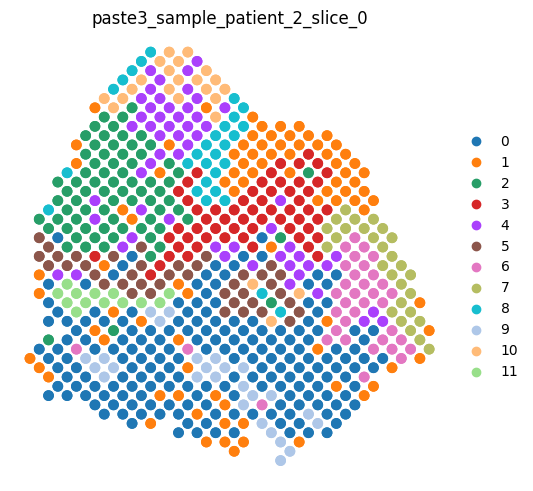

In [4]:
dataset.slices[0]

An entire dataset can be rendered by typing the dataset variable name in a cell, which renders each slice in order.

/home/vineetb/paste3/.venv/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/vineetb/paste3/.venv/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/vineetb/paste3/.venv/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


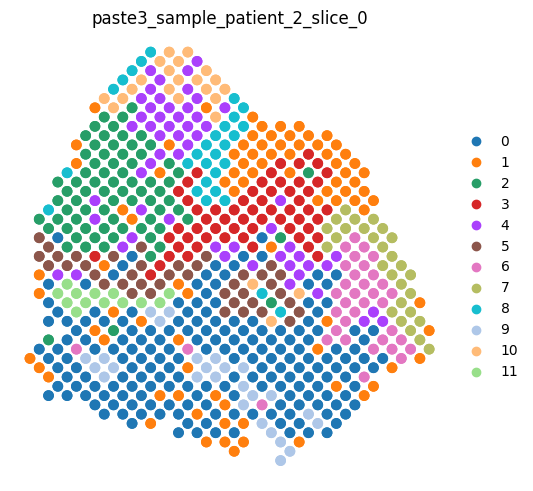

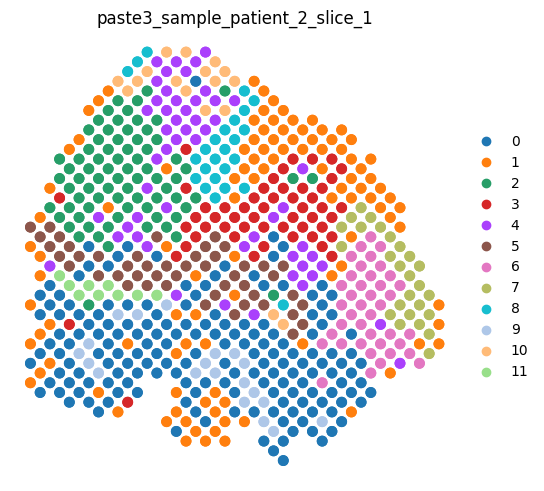

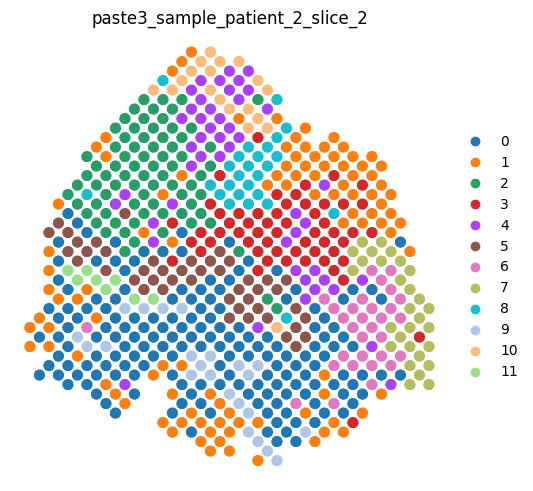

In [5]:
dataset

## Center Aligning a Dataset

A dataset object can be center aligned in 2 steps:

1. Find the "center slice" (or the "consensus slice") and similarity matrix between spots using the `<dataset>.find_center_slice` method. **This is a time consuming step and benefits from being run on a GPU-enabled environment.**
2. Use these values to center align the dataset using the `<dataset>.center_align` method.

The first returned value is the aligned dataset, along with other useful information (rotations/translations). Here we ignore all returned values except the first one.

Center alignment is explained in detail in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper.

In [6]:
center_slice, pis = dataset.find_center_slice()
aligned_dataset, *_ = dataset.center_align(center_slice=center_slice, pis=pis)

(INFO) (dataset.py) (14-Nov-24 15:05:22) Finding center slice
(INFO) (paste.py) (14-Nov-24 15:05:23) Filtered all slices for common genes. There are 12242 common genes.
(INFO) (paste.py) (14-Nov-24 15:05:41) Iteration: 0
(INFO) (paste.py) (14-Nov-24 15:05:41) Solving Pairwise Slice Alignment Problem.
(INFO) (paste.py) (14-Nov-24 15:05:41) Slice 0
(INFO) (paste.py) (14-Nov-24 15:05:42) Slice 1
(INFO) (paste.py) (14-Nov-24 15:05:42) Slice 2
(INFO) (paste.py) (14-Nov-24 15:05:43) center_ot done
(INFO) (paste.py) (14-Nov-24 15:05:43) Solving Center Mapping NMF Problem.


/home/vineetb/paste3/.venv/lib/python3.12/site-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


(INFO) (paste.py) (14-Nov-24 15:05:46) Objective -142.8201479118314
(INFO) (paste.py) (14-Nov-24 15:05:46) Difference: 142.8201479118314
(INFO) (paste.py) (14-Nov-24 15:05:46) Iteration: 1
(INFO) (paste.py) (14-Nov-24 15:05:46) Solving Pairwise Slice Alignment Problem.
(INFO) (paste.py) (14-Nov-24 15:05:46) Slice 0
(INFO) (paste.py) (14-Nov-24 15:05:47) Slice 1
(INFO) (paste.py) (14-Nov-24 15:05:47) Slice 2
(INFO) (paste.py) (14-Nov-24 15:05:48) center_ot done
(INFO) (paste.py) (14-Nov-24 15:05:48) Solving Center Mapping NMF Problem.
(INFO) (paste.py) (14-Nov-24 15:05:50) Objective 0.9015140113374002
(INFO) (paste.py) (14-Nov-24 15:05:50) Difference: 143.72166192316882
(INFO) (paste.py) (14-Nov-24 15:05:50) Iteration: 2
(INFO) (paste.py) (14-Nov-24 15:05:50) Solving Pairwise Slice Alignment Problem.
(INFO) (paste.py) (14-Nov-24 15:05:50) Slice 0
(INFO) (paste.py) (14-Nov-24 15:05:50) Slice 1
(INFO) (paste.py) (14-Nov-24 15:05:51) Slice 2
(INFO) (paste.py) (14-Nov-24 15:05:51) center_ot

We can render the center slice and the aligned dataset as usual.

In [ ]:
center_slice

In [ ]:
aligned_dataset

## Pairwise aligning a Dataset

A dataset can be pairwise aligned using the `<dataset>.pairwise_align` method. An `overlap_fraction` value (between 0 and 1) can be specified.

A value of `None` results in pairwise alignment that is identical to the approach mentioned in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper. Any other value between 0 and 1 results in pairwise alignment explained in the [Paste2](https://pubmed.ncbi.nlm.nih.gov/37553263/) paper.

In [ ]:
pairwise_aligned_dataset = dataset.pairwise_align(overlap_fraction=0.7)

In [ ]:
pairwise_aligned_dataset[0]